In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
ROOT = '../dataset/WeatherData/cities'
os.listdir(ROOT)

['bengaluru.csv',
 'bombay.csv',
 'delhi.csv',
 'hyderabad.csv',
 'jaipur.csv',
 'kanpur.csv',
 'nagpur.csv',
 'pune.csv']

In [25]:
dataframe = dict()

for filename in os.listdir(ROOT):
    data = pd.read_csv(os.path.join(ROOT, filename))
    # print(data.isna().sum())
    print(data.isna().all())
    data = data.drop(['moonrise', 'moonset','sunrise','sunset'], axis=1)
    dataframe[filename.split('.')[0]] = data

date_time            False
maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool
date_time            False
maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset          

In [26]:
dataframe["bombay"].head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,30,22,0.0,11.0,7,1,31,15,28,...,27,11,0,49,0.0,1012,22,10,20,10
1,2009-01-01 01:00:00,30,22,0.0,11.0,7,1,31,15,27,...,26,12,0,50,0.0,1012,22,10,18,11
2,2009-01-01 02:00:00,30,22,0.0,11.0,7,1,31,15,27,...,26,14,0,50,0.0,1012,22,10,16,12
3,2009-01-01 03:00:00,30,22,0.0,11.0,7,1,31,14,25,...,25,15,0,50,0.0,1012,22,10,14,13
4,2009-01-01 04:00:00,30,22,0.0,11.0,7,1,31,14,26,...,26,14,0,49,0.0,1013,22,10,28,12


In [57]:

def cleanData(df):
    df['date_time'] = df['date_time'].apply(lambda x : x.split('-')[0])
    
    return df

def groupBy(df):
    df = df.groupby("date_time").mean().reset_index()
    df.rename(columns={'date_time':'YEAR'}, inplace=True)
    return df
df = cleanData(dataframe["bombay"])

for dataframeName in dataframe:
    if dataframe == "bombay": continue
    df = pd.concat([df, cleanData(dataframe[dataframeName])], axis=0)

df = groupBy(df)
df.head()

,YEAR,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009,31.960122,21.678539,0.0,10.844840,6.522070,4.306190,46.556164,15.557953,29.483245,...,27.750165,13.906190,23.092111,55.664764,0.064406,1008.356139,26.316629,9.467783,200.049417,9.517732
1,2010,31.994521,21.617352,0.0,10.852572,6.452968,4.293151,46.449315,16.382522,29.492986,...,27.592491,13.205644,25.188407,58.605441,0.075843,1008.040322,26.222730,9.344292,197.148567,8.964447
2,2011,31.649924,20.880670,0.0,10.848432,6.386606,4.254515,45.208219,15.518100,28.857978,...,27.268975,14.709906,22.467174,55.194812,0.080928,1007.903247,25.736339,9.619457,193.231304,10.064181
3,2012,31.690346,21.459927,0.0,10.994475,6.491803,4.299674,47.027322,14.425698,28.768987,...,27.483012,15.722260,20.425230,51.702439,0.059529,1008.095654,26.125987,9.752112,203.693976,10.925939
4,2013,31.508980,21.710502,0.0,10.870746,6.490107,4.280873,45.789041,15.328907,28.823909,...,27.386428,15.604439,23.415157,54.288166,0.059958,1008.258283,26.159386,9.696664,199.876205,10.892516


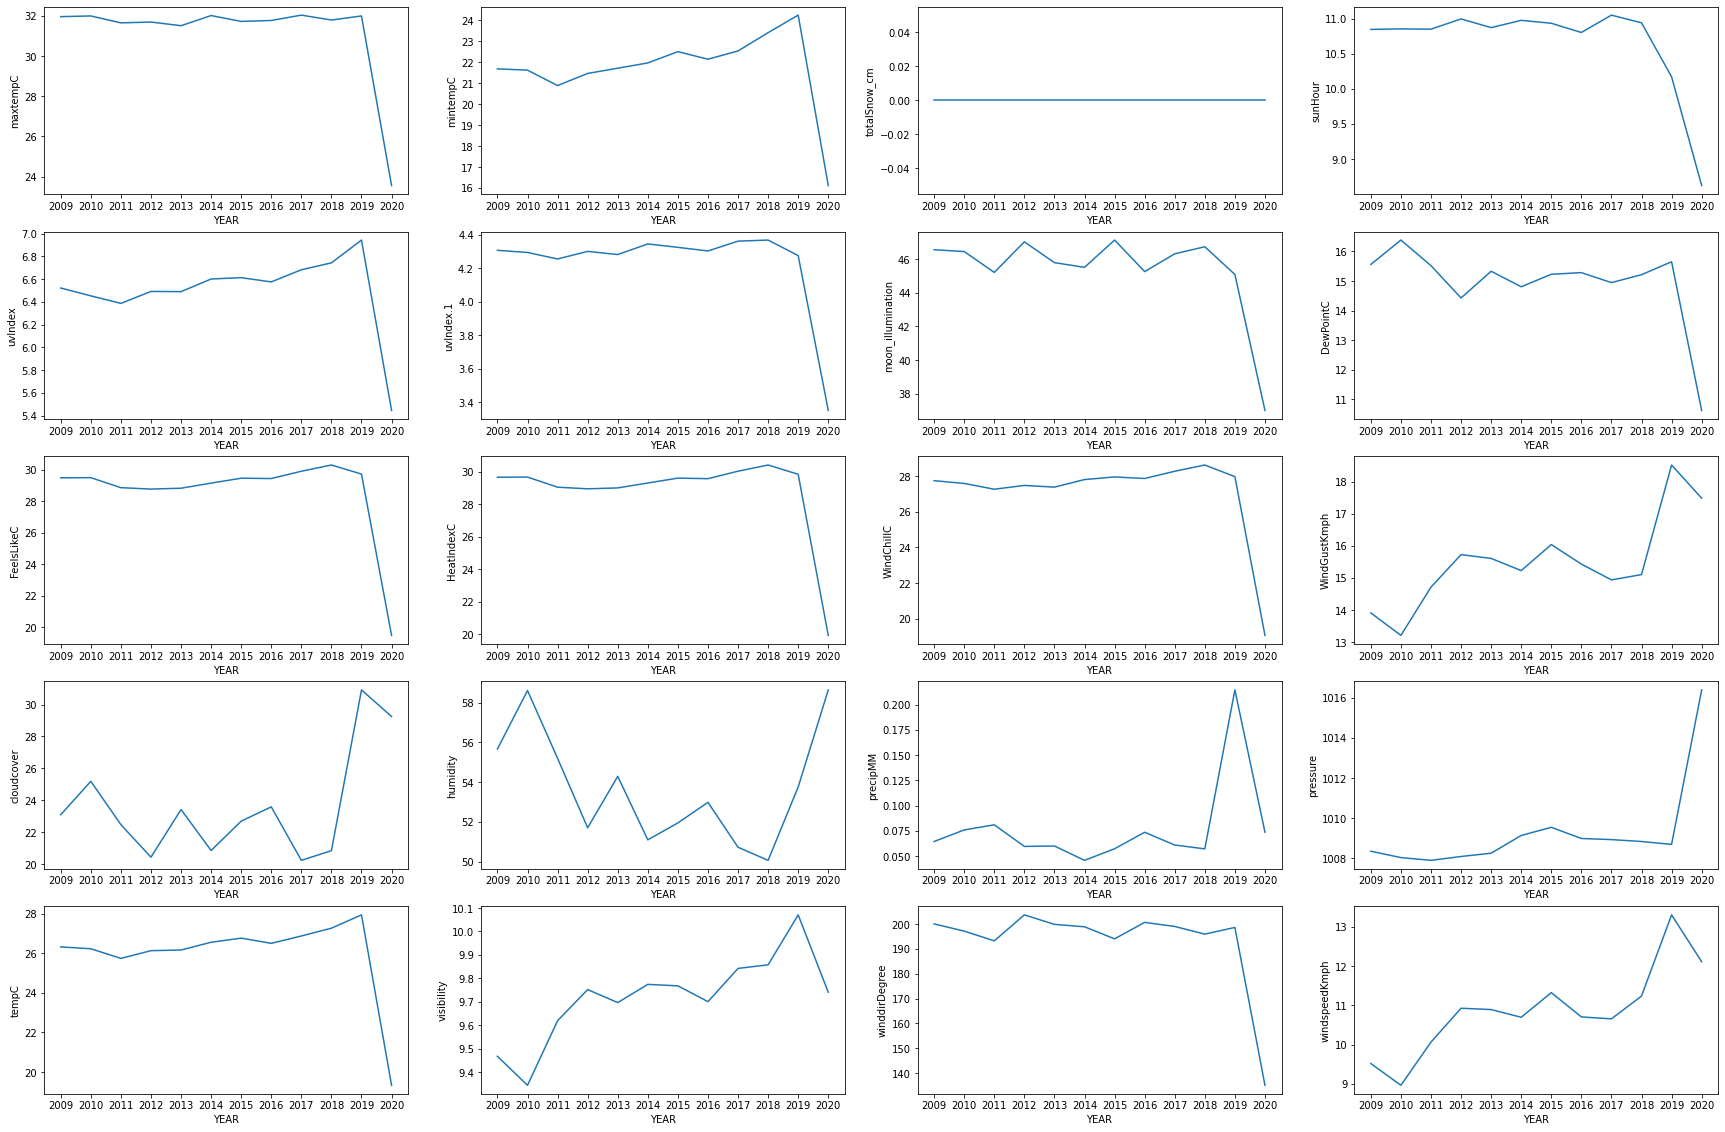

In [58]:
fig, ax = plt.subplots(5, 4, figsize=(30, 20))

for (idx, colName) in enumerate(df.columns.values.tolist()[1:]):
    sns.lineplot(x="YEAR", y=colName, data=df, ax=ax[idx // 4][idx % 4])
